<a href="https://colab.research.google.com/github/BogereMark879/Bogere-mark/blob/main/Road_acci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA OF US_ACCIDENTS_DEC21_UPDATED DATASET**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [ ]:
road_acci=pd.read_csv('/content/drive/MyDrive/US_Accidents_Dec21_updated.csv')
road_acci.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
colsToDelete = ['ID', 'Start_Time', 'End_Time',
                'End_Lat', 'End_Lng', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
                'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp']
data = road_acci.drop(colsToDelete, axis=1).dropna()
data.to_csv('cleaned.csv')
data.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,40.108910,-83.092860,3.230,42.1,36.1,58.0,29.76,10.0,SW,...,False,False,False,False,False,False,Night,Night,Night,Night
4,3,39.172393,-84.492792,0.500,37.0,29.8,93.0,29.69,10.0,WSW,...,False,False,False,False,False,False,Day,Day,Day,Day
7,2,41.375310,-81.820170,0.521,33.1,30.0,92.0,29.63,0.5,SW,...,False,False,False,False,False,False,Day,Day,Day,Day
9,2,40.109310,-82.968490,0.826,32.0,28.7,100.0,29.59,0.5,West,...,False,False,False,False,False,False,Day,Day,Day,Day
10,2,39.192880,-84.477230,0.307,33.8,29.6,100.0,29.66,3.0,NNW,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
WindDirections        = list( data["Wind_Direction"].unique() )
WeatherConditions     = list( data["Weather_Condition"].unique() )
SunriseSunsets        = list( data["Sunrise_Sunset"].unique() )
CivilTwilights        = list( data["Civil_Twilight"].unique() )
NauticalTwilights     = data["Nautical_Twilight"].unique()
AstronomicalTwilights = data["Astronomical_Twilight"].unique()

In [ ]:
def findIndex(x, lst=[]):
    for i in range(len(lst)):
        if(lst[i]==x):
            return i

In [ ]:
for i in WindDirections:
    data["Wind_Direction"][ data["Wind_Direction"]==i ] = findIndex(i, WindDirections)
for i in WeatherConditions:
    data["Weather_Condition"][ data["Weather_Condition"]==i ] = findIndex(i, WeatherConditions)
for i in SunriseSunsets:
    data["Sunrise_Sunset"][ data["Sunrise_Sunset"]==i ] = findIndex(i, SunriseSunsets)
for i in CivilTwilights:
    data["Civil_Twilight"][ data["Civil_Twilight"]==i ] = findIndex(i, CivilTwilights)
for i in NauticalTwilights:
    data["Nautical_Twilight"][ data["Nautical_Twilight"]==i ] = findIndex(i, NauticalTwilights)
for i in AstronomicalTwilights:
    data["Astronomical_Twilight"][ data["Astronomical_Twilight"]==i ] = findIndex(i, AstronomicalTwilights)

data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: Setti

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,40.108910,-83.092860,3.230,42.1,36.1,58.0,29.76,10.0,0,...,False,False,False,False,False,False,0,0,0,0
4,3,39.172393,-84.492792,0.500,37.0,29.8,93.0,29.69,10.0,1,...,False,False,False,False,False,False,1,1,1,1
7,2,41.375310,-81.820170,0.521,33.1,30.0,92.0,29.63,0.5,0,...,False,False,False,False,False,False,1,1,1,1
9,2,40.109310,-82.968490,0.826,32.0,28.7,100.0,29.59,0.5,2,...,False,False,False,False,False,False,1,1,1,1
10,2,39.192880,-84.477230,0.307,33.8,29.6,100.0,29.66,3.0,3,...,False,False,False,False,False,False,1,1,1,1


In [ ]:
cols = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station",
        "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
for column in cols:
    lst = []
    for i in data[column]:
        lst.append(1 if(i) else 0)
    data[column] = lst
data.to_csv('road.csv',index=False)
data.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,40.108910,-83.092860,3.230,42.1,36.1,58.0,29.76,10.0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,39.172393,-84.492792,0.500,37.0,29.8,93.0,29.69,10.0,1,...,0,0,0,0,0,0,1,1,1,1
7,2,41.375310,-81.820170,0.521,33.1,30.0,92.0,29.63,0.5,0,...,0,0,0,0,0,0,1,1,1,1
9,2,40.109310,-82.968490,0.826,32.0,28.7,100.0,29.59,0.5,2,...,0,0,0,0,0,0,1,1,1,1
10,2,39.192880,-84.477230,0.307,33.8,29.6,100.0,29.66,3.0,3,...,0,0,0,0,0,0,1,1,1,1


In [ ]:
data = data.astype("float")

In [ ]:
lat = data["Start_Lat"]
lng = data["Start_Lng"]
X   = data.drop(["Start_Lat", "Start_Lng"], axis=1)

X.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3.0,3.230,42.1,36.1,58.0,29.76,10.0,0.0,10.4,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.500,37.0,29.8,93.0,29.69,10.0,1.0,10.4,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
7,2.0,0.521,33.1,30.0,92.0,29.63,0.5,0.0,3.5,0.08,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
9,2.0,0.826,32.0,28.7,100.0,29.59,0.5,2.0,3.5,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
10,2.0,0.307,33.8,29.6,100.0,29.66,3.0,3.0,4.6,0.03,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


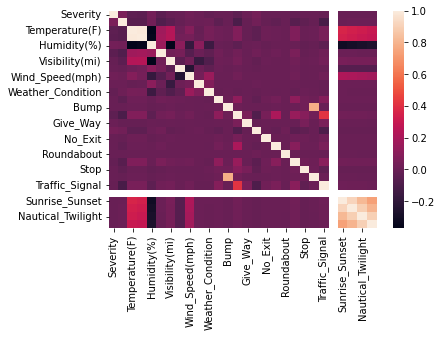

In [ ]:
sns.heatmap(X.corr()) #A heatmap is a graphical representation of data where each value of a matrix is represented as a color.

In [ ]:
colsToDelete = []
corrMatrix = X.corr()
for i in corrMatrix.index:
    for j in corrMatrix.columns:
        if( abs(corrMatrix[i][j])>=0.2 and i!=j ):
            colsToDelete.append(i)
colsToDelete = list( pd.Series(colsToDelete).unique() )
X = X.drop(colsToDelete, axis=1)
X.head()

,Severity,Distance(mi),Pressure(in),Precipitation(in),Weather_Condition,Amenity,Give_Way,Junction,No_Exit,Roundabout,Station,Stop,Turning_Loop
0,3.0,3.230,29.76,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.500,29.69,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.0,0.521,29.63,0.08,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.826,29.59,0.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2.0,0.307,29.66,0.03,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
predictLat = LinearRegression().fit(X, lat)
predictLng = LinearRegression().fit(X, lng)

In [ ]:
print( metrics.mean_squared_error(lat, predictLat.predict(X)) )

26.529969080256908


In [ ]:
newX = pd.DataFrame( PolynomialFeatures(degree=2).fit_transform(X) )
#Generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
newX.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,1.0,3.0,3.230,29.76,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,0.500,29.69,0.01,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,0.521,29.63,0.08,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,0.826,29.59,0.05,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,0.307,29.66,0.03,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


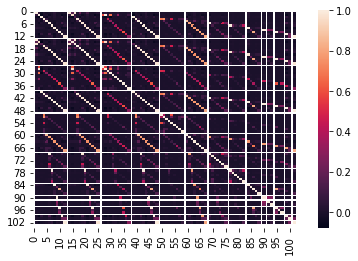

In [ ]:
sns.heatmap(newX.corr())

In [ ]:
colsToDelete = []
corrMatrix = newX.corr()
for i in corrMatrix.index:
    for j in corrMatrix.columns:
        if( abs(corrMatrix[i][j])>=0.2 and i!=j ):
            colsToDelete.append(i)
colsToDelete = list( pd.Series(colsToDelete).unique() )
newX = newX.drop(colsToDelete, axis=1)
newX.head()

,0,13,26,38,49,52,53,55,57,59,...,83,87,88,89,91,94,98,101,103,104
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
predictLatD2 = LinearRegression().fit(newX, lat)
predictLngD2 = LinearRegression().fit(newX, lng)

In [ ]:
print( metrics.mean_squared_error(lat, predictLatD2.predict(newX)) )

29.92810904891844


In [ ]:
import pickle
#Pickle: it's the process of converting a Python object into a byte stream to store it in a file/database,
# maintain program state across sessions, or transport data over the network.
filename = 'model.pkl'
pickle.dump(predictLatD2, open(filename, 'wb'))

In [ ]:
predictLngD2.predict(newX)

array([-96.62549177, -96.62549177, -96.62549177, ..., -96.62549177,
       -96.62549177, -96.62549177])

In [ ]:
df = pd.read_csv("road.csv")
df

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,40.108910,-83.092860,3.230,42.1,36.1,58.0,29.76,10.0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,39.172393,-84.492792,0.500,37.0,29.8,93.0,29.69,10.0,1,...,0,0,0,0,0,0,1,1,1,1
2,2,41.375310,-81.820170,0.521,33.1,30.0,92.0,29.63,0.5,0,...,0,0,0,0,0,0,1,1,1,1
3,2,40.109310,-82.968490,0.826,32.0,28.7,100.0,29.59,0.5,2,...,0,0,0,0,0,0,1,1,1,1
4,2,39.192880,-84.477230,0.307,33.8,29.6,100.0,29.66,3.0,3,...,0,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207321,2,34.002480,-117.379360,0.543,86.0,86.0,40.0,28.92,10.0,6,...,0,0,0,0,0,0,1,1,1,1
2207322,2,32.766960,-117.148060,0.338,70.0,70.0,73.0,29.39,10.0,0,...,0,0,0,0,0,0,1,1,1,1
2207323,2,33.775450,-117.847790,0.561,73.0,73.0,64.0,29.74,10.0,7,...,0,0,0,0,0,0,1,1,1,1
2207324,2,33.992460,-118.403020,0.772,71.0,71.0,81.0,29.62,10.0,0,...,0,0,0,0,0,0,1,1,1,1


In [ ]:
col_names = df.columns.tolist()
index = df.index
for i in col_names:
  print(i)

Severity
Start_Lat
Start_Lng
Distance(mi)
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


In [ ]:
#split dataset in features and target variable
feature_cols = ['Start_Lat',
                'Start_Lng',
                'Distance(mi)',
                'Temperature(F)',
                'Wind_Chill(F)',
                'Humidity(%)',
                'Pressure(in)',
                'Visibility(mi)',
                'Wind_Direction',
                'Wind_Speed(mph)',
                'Precipitation(in)',
                'Weather_Condition',
                'Amenity',
                'Bump',
                'Crossing',
                'Give_Way',
                'Junction',
                'No_Exit','Railway',
                'Roundabout','Station',
                'Stop','Traffic_Calming',
                'Traffic_Signal',
                'Turning_Loop',
                'Sunrise_Sunset',
                'Civil_Twilight',
                'Nautical_Twilight',
                'Astronomical_Twilight']

X = df[feature_cols] # Features
y = df.Severity # Target variable

In [ ]:
X.shape

(2207326, 29)

In [ ]:
y

0          3
1          3
2          2
3          2
4          2
          ..
2207321    2
2207322    2
2207323    2
2207324    2
2207325    2
Name: Severity, Length: 2207326, dtype: int64

In [ ]:
for i in range(len(y)):
    if y[i]==0 or y[i]==1:
        y[i]=0
    else:
        y[i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
y

0          1
1          1
2          1
3          1
4          1
          ..
2207321    1
2207322    1
2207323    1
2207324    1
2207325    1
Name: Severity, Length: 2207326, dtype: int64

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
#logisticRegression predicts categorical outcomes
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [ ]:
from sklearn import metrics #implements several loss, score, and utility functions to measure classification performance.
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[     0,   5886],
       [     1, 545945]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

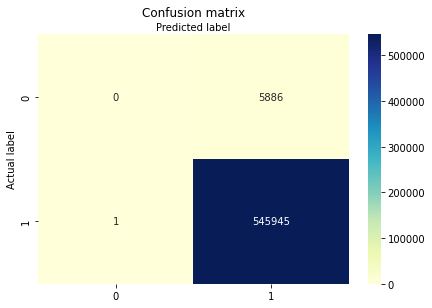

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9893318981139188
Precision: 0.9893336909307379
Recall: 0.999998168317013


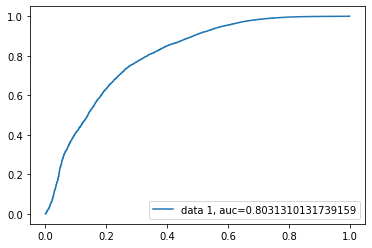

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
import pickle
filename = 'model1.pkl'
pickle.dump(logreg, open(filename, 'wb'))

In [ ]:
import joblib
model = joblib.load("model1.pkl")

In [ ]:
processed_results = model.predict(X_test)

In [ ]:
processed_results

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
 !pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **DATA PROCESSING**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import category_encoders as ce

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize


import plotly.graph_objects as go
from nltk.corpus import stopwords

In [ ]:
road=pd.read_csv('/content/drive/MyDrive/US_Accidents_Dec21_updated.csv')
road.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
dataf = road[road_features].sum().sort_values(ascending=False)
dataf

Junction           290505
Traffic_Signal     265263
Crossing           200212
Station             67995
Stop                50400
Amenity             27990
Railway             22631
Give_Way             6868
No_Exit              4294
Traffic_Calming      1712
Bump                 1021
Roundabout            123
Turning_Loop            0
dtype: int64

In [ ]:
X=road
len(X)

2845342

In [ ]:
X.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
X["Start_Time"] = pd.to_datetime(X["Start_Time"])

# Extract year, month, weekday and day
X["Year"] = X["Start_Time"].dt.year
X["Month"] = X["Start_Time"].dt.month
X["Weekday"] = X["Start_Time"].dt.weekday
X["Day"] = X["Start_Time"].dt.day

# Extract hour and minute
X["Hour"] = X["Start_Time"].dt.hour
X["Minute"] = X["Start_Time"].dt.minute

X.head(100)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,Night,Night,Night,Night,2016,2,0,8,0,37
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,Night,Night,Night,Night,2016,2,0,8,5,56
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,Night,Night,Night,Day,2016,2,0,8,6,15
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,Night,Night,Day,Day,2016,2,0,8,6,51
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,Day,Day,Day,Day,2016,2,0,8,7,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A-96,2,2016-02-11 07:47:57,2016-02-11 13:47:57,41.377170,-81.513900,41.368280,-81.516470,0.629,At Broadway Ave/Forbes Rd/Exit 23 - Accident.,...,Day,Day,Day,Day,2016,2,3,11,7,47
96,A-97,2,2016-02-11 07:58:15,2016-02-11 13:58:15,39.173970,-84.490310,39.176500,-84.487570,0.228,At OH-562/Exit 7 - Accident.,...,Day,Day,Day,Day,2016,2,3,11,7,58
97,A-98,2,2016-02-11 08:28:42,2016-02-11 14:28:42,39.755130,-84.166140,39.754240,-84.155980,0.543,At Steve Whalen Blvd - Accident.,...,Day,Day,Day,Day,2016,2,3,11,8,28
98,A-99,2,2016-02-11 08:40:21,2016-02-11 14:40:21,39.173970,-84.490310,39.176500,-84.487570,0.228,At OH-562/Exit 7 - Accident.,...,Day,Day,Day,Day,2016,2,3,11,8,40


In [ ]:
features_to_drop =  ['ID','Start_Time','End_Time','End_Lat','End_Lng','Description','Number','Street',
                 'County', 'Zipcode','Country','Timezone','Airport_Code','Weather_Timestamp','Wind_Chill(F)',
                 'Turning_Loop','Sunrise_Sunset', 'Nautical_Twilight', 'Astronomical_Twilight','Distance(mi)',
                 'Side','Stop','Traffic_Signal','Civil_Twilight','Traffic_Calming','Amenity','Bump','Crossing',
                 'Give_Way','Junction','No_Exit','Railway','Roundabout','Station','City','State','Wind_Direction','Weather_Condition']
X = X.drop(features_to_drop, axis=1)
X.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Weekday,Day,Hour,Minute
0,3,40.108910,-83.092860,42.1,58.0,29.76,10.0,10.4,0.00,2016,2,0,8,0,37
1,2,39.865420,-84.062800,36.9,91.0,29.68,10.0,NaN,0.02,2016,2,0,8,5,56
2,2,39.102660,-84.524680,36.0,97.0,29.70,10.0,NaN,0.02,2016,2,0,8,6,15
3,2,41.062130,-81.537840,39.0,55.0,29.65,10.0,NaN,NaN,2016,2,0,8,6,51
4,3,39.172393,-84.492792,37.0,93.0,29.69,10.0,10.4,0.01,2016,2,0,8,7,53


In [ ]:
X.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Year', 'Month', 'Weekday', 'Day', 'Hour',
       'Minute'],
      dtype='object')

In [ ]:
print("Number of rows:", len(X.index))
X.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(X.index))

Number of rows: 2845342
Number of rows after drop of duplicates: 2609360


In [ ]:
X

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Weekday,Day,Hour,Minute
0,3,40.108910,-83.092860,42.1,58.0,29.76,10.0,10.4,0.00,2016,2,0,8,0,37
1,2,39.865420,-84.062800,36.9,91.0,29.68,10.0,NaN,0.02,2016,2,0,8,5,56
2,2,39.102660,-84.524680,36.0,97.0,29.70,10.0,NaN,0.02,2016,2,0,8,6,15
3,2,41.062130,-81.537840,39.0,55.0,29.65,10.0,NaN,NaN,2016,2,0,8,6,51
4,3,39.172393,-84.492792,37.0,93.0,29.69,10.0,10.4,0.01,2016,2,0,8,7,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,86.0,40.0,28.92,10.0,13.0,0.00,2019,8,4,23,18,3
2845338,2,32.766960,-117.148060,70.0,73.0,29.39,10.0,6.0,0.00,2019,8,4,23,19,11
2845339,2,33.775450,-117.847790,73.0,64.0,29.74,10.0,10.0,0.00,2019,8,4,23,19,0
2845340,2,33.992460,-118.403020,71.0,81.0,29.62,10.0,8.0,0.00,2019,8,4,23,19,0


In [ ]:
X[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,2554507.00,2543933.00
mean,29.48,9.10
std,1.04,2.74
min,0.00,0.00
25%,29.32,10.00
50%,29.82,10.00
75%,30.01,10.00
max,58.90,140.00


In [ ]:
X = X[X["Pressure(in)"] != 0]
X = X[X["Visibility(mi)"] != 0]
X[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,2551629.00,2541054.00
mean,29.48,9.11
std,1.04,2.72
min,0.02,0.06
25%,29.32,10.00
50%,29.82,10.00
75%,30.01,10.00
max,58.90,140.00


In [ ]:

X.head(10)

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Weekday,Day,Hour,Minute
0,3,40.108910,-83.092860,42.1,58.0,29.76,10.0,10.4,0.00,2016,2,0,8,0,37
1,2,39.865420,-84.062800,36.9,91.0,29.68,10.0,NaN,0.02,2016,2,0,8,5,56
2,2,39.102660,-84.524680,36.0,97.0,29.70,10.0,NaN,0.02,2016,2,0,8,6,15
3,2,41.062130,-81.537840,39.0,55.0,29.65,10.0,NaN,NaN,2016,2,0,8,6,51
4,3,39.172393,-84.492792,37.0,93.0,29.69,10.0,10.4,0.01,2016,2,0,8,7,53
5,2,39.063240,-84.032430,35.6,100.0,29.66,10.0,8.1,NaN,2016,2,0,8,8,16
6,2,39.775650,-84.186030,33.8,100.0,29.63,3.0,2.3,NaN,2016,2,0,8,8,15
7,2,41.375310,-81.820170,33.1,92.0,29.63,0.5,3.5,0.08,2016,2,0,8,11,51
8,2,40.702247,-84.075887,39.0,70.0,29.59,10.0,11.5,NaN,2016,2,0,8,14,19
9,2,40.109310,-82.968490,32.0,100.0,29.59,0.5,3.5,0.05,2016,2,0,8,15,16


## **Analyzing missing values**

In [ ]:
X.isna().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
Temperature(F)        64070
Humidity(%)           67558
Pressure(in)          54851
Visibility(mi)        65426
Wind_Speed(mph)      151312
Precipitation(in)    536327
Year                      0
Month                     0
Weekday                   0
Day                       0
Hour                      0
Minute                    0
dtype: int64

In [ ]:
features_to_fill = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
X[features_to_fill] = X[features_to_fill].fillna(X[features_to_fill].mean())

X.dropna(inplace=True)

X.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Year                 0
Month                0
Weekday              0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [ ]:
len(X)

2606480

In [ ]:
X.describe().round(2)

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Weekday,Day,Hour,Minute
count,2606480.00,2606480.00,2606480.00,2606480.00,2606480.00,2606480.00,2606480.00,2606480.00,2606480.00,2606480.00,2606480.00,2606480.00,2606480.00,2606480.00,2606480.00
mean,2.15,36.33,-97.35,61.73,64.35,29.48,9.11,7.40,0.01,2019.91,7.43,2.75,16.06,12.77,29.69
std,0.49,5.30,18.28,18.43,22.62,1.03,2.69,5.37,0.09,1.47,3.64,1.87,8.72,5.86,17.27
min,1.00,24.57,-124.55,-89.00,1.00,0.02,0.06,0.00,0.00,2016.00,1.00,0.00,1.00,0.00,0.00
25%,2.00,33.51,-118.06,50.00,49.00,29.33,10.00,4.60,0.00,2019.00,4.00,1.00,9.00,8.00,15.00
50%,2.00,36.14,-93.04,63.00,66.00,29.81,10.00,7.00,0.00,2021.00,8.00,3.00,16.00,14.00,30.00
75%,2.00,40.17,-80.42,75.90,83.00,30.01,10.00,10.00,0.01,2021.00,11.00,4.00,23.00,17.00,45.00
max,4.00,49.00,-67.11,196.00,100.00,58.90,140.00,1087.00,24.00,2021.00,12.00,6.00,31.00,23.00,59.00


## **Working on unbalanced data**

In [ ]:
size = len(X[X["Severity"]==1].index)
road = pd.DataFrame()
for i in range(1,5):
    S = X[X["Severity"]==i]
    road = road.append(S.sample(size, random_state=42))
X = road

NameError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
scaler = scaler.fit(X[features])
X[features]=scaler.transform(X[features])
X.head()

NameError: ignored

In [ ]:
import joblib
scaler_filename = "saved_scaler"
joblib.dump(scaler, scaler_filename)

In [ ]:
X = X.replace([True, False], [1, 0])

X.head()

In [ ]:
X

In [ ]:
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

## **Training and Validation**

In [ ]:
X, X_test = train_test_split(X, test_size=.2, random_state=42)
print(X.shape, X_test.shape)

(80102, 15) (20026, 15)


In [ ]:
sample = X
y_sample = sample["Severity"]
X_sample = sample.drop("Severity", axis=1)

	
X_train, X_validate, y_train, y_validate = train_test_split(X_sample, y_sample, random_state=42)
print(X_train.shape, y_train.shape)
print(X_validate.shape, y_validate.shape)

(60076, 14) (60076,)
(20026, 14) (20026,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample, train_size = 0.75, random_state = 12)

In [ ]:
X_sample

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Weekday,Day,Hour,Minute
2261107,0.313451,0.238949,0.636364,0.204082,0.651625,0.124343,0.032258,0.000000,0.8,0.272727,0.500000,0.500000,0.391304,0.389831
36947,0.170302,0.748282,0.634965,0.673469,0.931408,0.086815,0.024731,0.000715,0.0,1.000000,0.666667,0.500000,0.391304,0.796610
63224,0.707998,0.646001,0.650350,0.897959,0.905235,0.099324,0.043548,0.004000,0.0,0.818182,0.833333,0.000000,0.565217,0.389831
2427207,0.588919,0.838523,0.608392,0.938776,0.901625,0.061796,0.016129,0.000000,0.6,0.818182,0.166667,0.700000,0.304348,0.491525
2665774,0.474084,0.763650,0.660140,0.632653,0.909747,0.124343,0.039811,0.000715,0.4,0.272727,1.000000,0.466667,0.043478,0.661017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084008,0.640190,0.878175,0.650350,0.418367,0.908845,0.124343,0.043011,0.000000,0.8,0.454545,0.000000,0.000000,0.434783,0.593220
2155608,0.382456,0.110426,0.664336,0.775510,0.888087,0.124343,0.037634,0.000000,0.8,0.454545,0.666667,0.133333,1.000000,0.661017
2181365,0.668874,0.872098,0.692308,0.806122,0.884477,0.124343,0.032258,0.000000,0.8,0.454545,0.500000,0.566667,0.304348,0.813559
2240524,0.549059,0.041654,0.587413,0.653061,0.891697,0.111834,0.039811,0.000000,0.8,0.272727,0.000000,0.166667,0.565217,0.661017


In [ ]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [ 100, 200, 500], "max_depth": [ 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_validate, y_validate))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:

rfc.fit(X_train, y_train)
print("Train score:", rfc.score(X_train, y_train))
print("Validation score:", rfc.score(X_validate, y_validate))

Train score: 0.9998834809241627
Validation score: 0.9367821831618895


In [ ]:
y_pred=rfc.predict(X_sample)

In [ ]:
import pickle
pickle.dump(rfc,open('lr_model.pkl','wb'))

In [ ]:
y_sample

2261107    1
36947      3
63224      3
2427207    4
2665774    4
          ..
2084008    1
2155608    3
2181365    4
2240524    1
2212094    1
Name: Severity, Length: 80102, dtype: int64

In [ ]:
y_pred

array([1, 3, 3, ..., 4, 1, 1])

In [ ]:
print("Accuracy: ", accuracy_score(y_sample,y_pred))

Accuracy:  0.9354572919527603
